# TM10007 Assignment template -- ECG data

## Data loading and cleaning

Below are functions to load the dataset of your choice. After that, it is all up to you to create and evaluate a classification method. Beware, there may be missing values in these datasets. Good luck!

### Load features and labels into dataframe from csv file 

In [3]:
import zipfile
import os
import pandas as pd

with zipfile.ZipFile('./ecg/ecg_data.zip', 'r') as zip_ref:
    zip_ref.extractall('./ecg/')

data = pd.read_csv('./ecg/ecg_data.csv', index_col=0)

file = './ecg/ecg_data.csv'
if(os.path.exists(file) and os.path.isfile(file)):
  os.remove(file)

print(f'The number of samples: {len(data.index)}')
print(f'The number of columns: {len(data.columns)}')

The number of samples: 827
The number of columns: 9001


### Create test-train split

In [5]:
from sklearn.model_selection import train_test_split

y = data.label
X = data.drop('label', axis=1)

# Need to find logical nubmers for test_size and random_state and add this in the report. 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

### Preprocessing

In [31]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA 
from sklearn.feature_selection import SelectKBest, chi2, SequentialFeatureSelector
from sklearn.naive_bayes import GaussianNB
from sklearn.manifold import TSNE

scaler = Normalizer()
random_forest = RandomForestClassifier()
pca = PCA()

# "greedy_featureselection", SequentialFeatureSelector(estimator = random_forest, n_features_to_select=10, cv=2, n_jobs=-1))
#
pipe = Pipeline(steps=[('select', SelectKBest()), ("random_forest", random_forest)])

### Gridsearch for optimal hyperparameters Random Forest Classifer 

In [32]:
from sklearn.model_selection import GridSearchCV

parameters = {'select__k': [2, 5, 10, 20], 'random_forest__n_estimators': [50,100, 500, 1000]}
search = GridSearchCV(pipe, parameters, cv=5, scoring = 'f1', verbose=5)
search.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END random_forest__n_estimators=50, select__k=2;, score=0.154 total time=   4.2s
[CV 2/5] END random_forest__n_estimators=50, select__k=2;, score=0.286 total time=   4.0s
[CV 3/5] END random_forest__n_estimators=50, select__k=2;, score=0.176 total time=   4.0s
[CV 4/5] END random_forest__n_estimators=50, select__k=2;, score=0.069 total time=   2.7s
[CV 5/5] END random_forest__n_estimators=50, select__k=2;, score=0.242 total time=   3.1s
[CV 1/5] END random_forest__n_estimators=50, select__k=5;, score=0.276 total time=   2.5s
[CV 2/5] END random_forest__n_estimators=50, select__k=5;, score=0.286 total time=   2.9s
[CV 3/5] END random_forest__n_estimators=50, select__k=5;, score=0.432 total time=   2.6s
[CV 4/5] END random_forest__n_estimators=50, select__k=5;, score=0.125 total time=   2.6s
[CV 5/5] END random_forest__n_estimators=50, select__k=5;, score=0.214 total time=   2.1s
[CV 1/5] END random_forest__n_estimator

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('select', SelectKBest()),
                                       ('random_forest',
                                        RandomForestClassifier())]),
             param_grid={'random_forest__n_estimators': [50, 100, 500, 1000],
                         'select__k': [2, 5, 10, 20]},
             scoring='f1', verbose=5)

In [33]:
evaluation_grid= pd.DataFrame(search.cv_results_).sort_values('rank_test_score')
evaluation_grid.drop(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time'], axis=1)

,param_random_forest__n_estimators,param_select__k,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
15,1000,20,"{'random_forest__n_estimators': 1000, 'select_...",0.333333,0.333333,0.411765,0.258065,0.285714,0.324442,0.052324,1
11,500,20,"{'random_forest__n_estimators': 500, 'select__...",0.322581,0.344828,0.388889,0.258065,0.285714,0.320015,0.045564,2
3,50,20,"{'random_forest__n_estimators': 50, 'select__k...",0.266667,0.387097,0.400000,0.242424,0.285714,0.316380,0.064613,3
7,100,20,"{'random_forest__n_estimators': 100, 'select__...",0.333333,0.344828,0.363636,0.258065,0.275862,0.315145,0.040901,4
10,500,10,"{'random_forest__n_estimators': 500, 'select__...",0.258065,0.333333,0.333333,0.129032,0.466667,0.304086,0.110368,5
14,1000,10,"{'random_forest__n_estimators': 1000, 'select_...",0.258065,0.333333,0.368421,0.066667,0.451613,0.295620,0.130297,6
2,50,10,"{'random_forest__n_estimators': 50, 'select__k...",0.187500,0.322581,0.315789,0.068966,0.562500,0.291467,0.164520,7
6,100,10,"{'random_forest__n_estimators': 100, 'select__...",0.250000,0.285714,0.270270,0.133333,0.500000,0.287864,0.118852,8
13,1000,5,"{'random_forest__n_estimators': 1000, 'select_...",0.285714,0.285714,0.388889,0.062500,0.322581,0.269080,0.109950,9
1,50,5,"{'random_forest__n_estimators': 50, 'select__k...",0.275862,0.285714,0.432432,0.125000,0.214286,0.266659,0.100736,10


### Complexity - Learning Curve

In [7]:
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()


[learning_curve] Training set sizes: [ 66 214 363 512 661]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   4.8s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.0s remaining:    0.0s


[CV] END .................................................... total time=   9.1s
[CV] END .................................................... total time=  14.3s
[CV] END .................................................... total time=  11.0s
[CV] END .................................................... total time=  14.6s
[CV] END .................................................... total time=   2.1s
[CV] END .................................................... total time=   3.6s
[CV] END .................................................... total time=   6.9s
[CV] END .................................................... total time=   9.2s
[CV] END .................................................... total time=  14.6s
[CV] END .................................................... total time=   1.3s
[CV] END .................................................... total time=   2.9s
[CV] END .................................................... total time=   6.7s
[CV] END ...................

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  3.5min finished


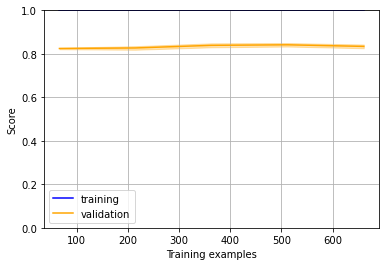

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def plot_learning_curve(clf, X, y):
    train_size, train_scores, test_scores = learning_curve(clf, X, y, verbose=2)
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.plot(train_size, train_mean, color='b', label='training')
    plt.plot(train_size, test_mean, color='orange', label='validation')

    plt.fill_between(train_size, train_mean-train_std, train_mean+train_std, color='b', alpha=0.3)
    plt.fill_between(train_size, test_mean-test_std, test_mean+test_std, color='orange', alpha=0.3)
    
    plt.grid()
    plt.ylim([0, 1.1])
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    plt.legend()
    plt.show()

plot_learning_curve(clf, X, y)

### Evaluation of classifier 

In [138]:
from sklearn.metrics import f1_score, confusion_matrix
best_clf = search.best_estimator_
y_pred = best_clf.predict(X_test)
f1_score(y_test, y_pred)


0.25396825396825395

In [139]:
pd.DataFrame(confusion_matrix(y_test, y_pred), columns=['normal', 'abnormal'], index= ['normal', 'abnormal'])

,normal,abnormal
normal,218,9
abnormal,38,8
